In [1]:
!pip install vaderSentiment --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.2 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


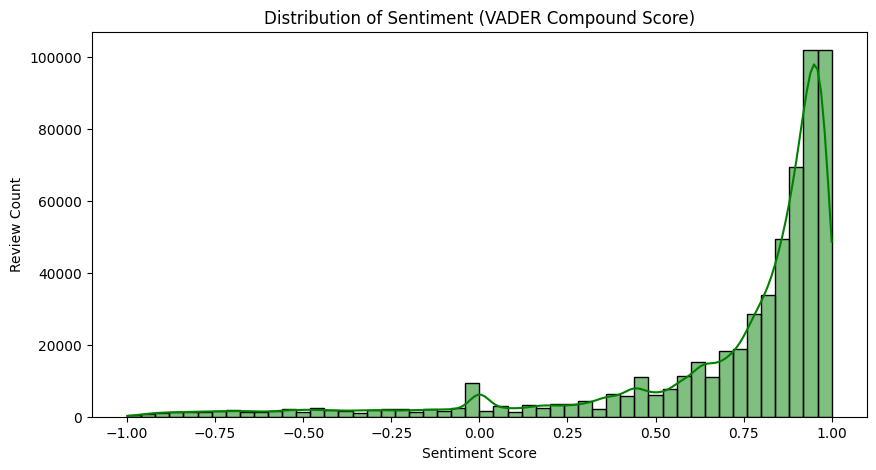

In [2]:
# Step 1: Imports
import pandas as pd
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# Step 2: Load your dataset
df = pd.read_csv('/kaggle/input/sentiment-analysis/Reviews.csv')  # Adjust if filename is different
df = df[['Text']].dropna().copy()

# Step 3: Clean the review text
stop_words = ENGLISH_STOP_WORDS

def clean_text(text):
    text = re.sub('[^a-zA-Z]', ' ', str(text))
    text = text.lower().split()
    return ' '.join([word for word in text if word not in stop_words])

df['clean_text'] = df['Text'].apply(clean_text)

# Step 4: Apply VADER Sentiment Scoring
analyzer = SentimentIntensityAnalyzer()
df['vader_score'] = df['clean_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Step 5: Visualize sentiment score distribution
plt.figure(figsize=(10,5))
sns.histplot(df['vader_score'], bins=50, kde=True, color='green')
plt.title('Distribution of Sentiment (VADER Compound Score)')
plt.xlabel('Sentiment Score')
plt.ylabel('Review Count')
plt.show()


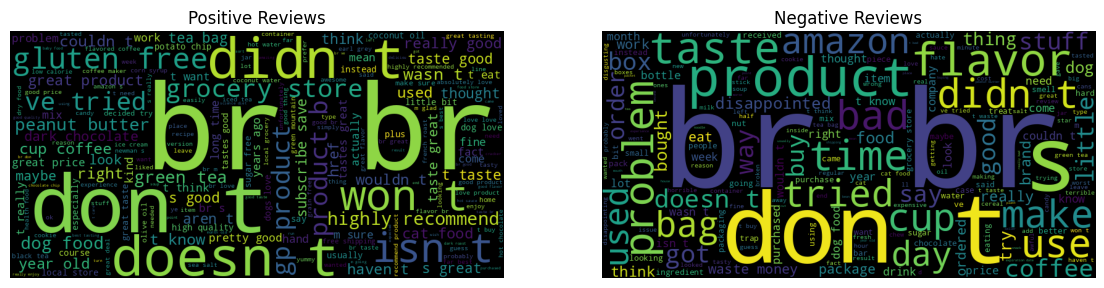

In [3]:
positive = ' '.join(df[df['vader_score'] > 0.05]['clean_text'])
negative = ' '.join(df[df['vader_score'] < -0.05]['clean_text'])

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.imshow(WordCloud(width=800, height=400).generate(positive))
plt.title('Positive Reviews'); plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(WordCloud(width=800, height=400).generate(negative))
plt.title('Negative Reviews'); plt.axis('off')

plt.show()


# 🧠 Sentiment Analysis of Customer Reviews (Retail)

This project analyzes customer review text and measures sentiment using VADER, a rule-based sentiment engine. The results are visualized using sentiment histograms and word clouds to gain insight into how customers feel about retail products.

### What this project includes:
- Text cleaning with stopwords removal
- Sentiment scoring with VADER
- Visual insights: sentiment distribution + word clouds

# 🧠 Sentiment Analysis of Customer Reviews (Retail)

This project analyzes customer review text and measures sentiment using VADER, a rule-based sentiment engine. The results are visualized using sentiment histograms and word clouds to gain insight into how customers feel about retail products.

### What this project includes:
- Text cleaning with stopwords removal
- Sentiment scoring with VADER
- Visual insights: sentiment distribution + word clouds

